In [1]:
# importing breast cancer data from the sklearn library
from sklearn.datasets import load_breast_cancer

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [3]:
breast_cancer = load_breast_cancer()

In [4]:
# observing the data
breast_cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
# observing the target
breast_cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
# accesing the data and target
X, y = breast_cancer['data'], breast_cancer['target']

In [7]:
X = pd.DataFrame(X)

In [8]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [163]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [164]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-3.215499e-15,-2.682836e-15,6.405133e-16,1.176104e-16,6.105007e-16,-9.056248e-16,2.488852e-16,-1.771477e-16,-4.951839e-15,3.298399e-15,...,9.328313e-16,7.195221e-15,6.048885e-16,-5.221708e-17,2.243993e-15,-2.730844e-15,-1.058982e-16,6.273370e-16,2.762137e-15,2.462621e-15
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.827622e+00,-2.096660e+00,-1.793558e+00,-1.362771e+00,-2.380724e+00,-1.602725e+00,-1.090794e+00,-1.224747e+00,-2.690253e+00,-1.810315e+00,...,-1.576352e+00,-2.134571e+00,-1.575651e+00,-1.146700e+00,-2.652142e+00,-1.444957e+00,-1.295441e+00,-1.719308e+00,-2.130958e+00,-1.565362e+00
25%,-6.912322e-01,-7.044822e-01,-6.846080e-01,-6.619432e-01,-7.608900e-01,-7.517668e-01,-7.318864e-01,-7.254115e-01,-6.612591e-01,-7.174026e-01,...,-6.665336e-01,-7.132637e-01,-6.776491e-01,-6.336277e-01,-7.104217e-01,-6.774524e-01,-7.511945e-01,-7.543268e-01,-6.608078e-01,-6.683948e-01
50%,-2.081116e-01,-1.085034e-01,-2.313919e-01,-2.855596e-01,-8.238293e-02,-2.492850e-01,-3.534538e-01,-3.999238e-01,-8.674111e-02,-1.849213e-01,...,-2.699672e-01,-7.075511e-02,-2.792851e-01,-3.355737e-01,-4.901916e-02,-2.505215e-01,-2.266860e-01,-2.325984e-01,-1.185789e-01,-2.129942e-01
75%,4.609329e-01,5.788041e-01,4.994700e-01,3.423034e-01,6.120848e-01,5.159447e-01,4.065206e-01,5.378364e-01,5.350473e-01,4.729761e-01,...,4.951360e-01,6.731595e-01,5.219309e-01,3.154253e-01,5.839124e-01,4.563905e-01,5.250533e-01,7.191144e-01,4.680289e-01,4.410563e-01
max,3.924471e+00,4.671035e+00,3.929213e+00,5.127792e+00,4.776054e+00,4.649912e+00,4.216963e+00,3.881541e+00,4.509403e+00,4.995125e+00,...,4.104721e+00,3.876779e+00,4.309606e+00,5.898913e+00,3.980718e+00,5.227399e+00,4.731953e+00,2.693509e+00,6.055730e+00,6.870892e+00


# **Bagging Classifier**

In [67]:
bagging_classification_models = ['Bagging_Classifier_1', 'Bagging_Classifier_2',  'Bagging_Classifier_3', 'Bagging_Classifier_4', 'Bagging_Classifier_5']

bagging_classifiers = []

bagging_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=25, max_samples=15, bootstrap=True, n_jobs=-1, random_state=42))
bagging_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=50, max_samples=15, bootstrap=True, n_jobs=-1, random_state=42))
bagging_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, max_samples=15, bootstrap=True, n_jobs=-1, random_state=42))
bagging_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, max_samples=25, bootstrap=True, n_jobs=-1, random_state=42))
bagging_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, max_samples=50, bootstrap=True, n_jobs=-1, random_state=42))


In [68]:
bagging_train_accuracies = []
bagging_test_accuracies = []

for bagging_classifier in bagging_classifiers:
    bagging_pipeline = Pipeline(steps = [
              ('bagging_classifier',bagging_classifier)
           ])
    
    print(f'************START OF THE {bagging_classifier} MODEL************\n')
    
    print(f'Training the {bagging_classifier} model')
    bagging_model = bagging_pipeline.fit(X_train, y_train)

    print('\nTraining Details:')
    
    bagging_train_predictions = bagging_model.predict(X_train)
    bagging_train_accuracy = accuracy_score(y_train, bagging_train_predictions)
    bagging_train_accuracies.append(bagging_train_accuracy)
    print(f'{bagging_classifier} model traiing accuracy: {bagging_train_accuracy}')
    
    print(f'\nTesting the {bagging_classifier} model')

    print('\nTesting Details:')

    bagging_test_predictions = bagging_model.predict(X_test)
    bagging_test_accuracy = accuracy_score(y_test, bagging_test_predictions)
    bagging_test_accuracies.append(bagging_test_accuracy)
    print(f'{bagging_classifier} model testing accuracy: {bagging_test_accuracy}')

    print(f'\n************END OF THE {bagging_classifier} MODEL************\n\n')

************START OF THE BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=15, n_estimators=25, n_jobs=-1, random_state=42) MODEL************

Training the BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=15, n_estimators=25, n_jobs=-1, random_state=42) model

Training Details:
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=15, n_estimators=25, n_jobs=-1, random_state=42) model traiing accuracy: 0.9560439560439561

Testing the BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=15, n_estimators=25, n_jobs=-1, random_state=42) model

Testing Details:
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=15, n_estimators=25, n_jobs=-1, random_state=42) model testing accuracy: 0.9473684210526315

************END OF THE Baggin

In [70]:
bagging_model_accuracy_compare = pd.DataFrame({'Bagging Algorithm' : bagging_classification_models, 'Bagging Training Accuracy' : bagging_train_accuracies, 'Bagging Testing Accuracy' : bagging_test_accuracies})
bagging_model_accuracy_compare.sort_values(by='Bagging Testing Accuracy', ascending=False)

,Bagging Algorithm,Bagging Training Accuracy,Bagging Testing Accuracy
4,Bagging_Classifier_5,0.949451,0.982456
3,Bagging_Classifier_4,0.940659,0.973684
2,Bagging_Classifier_3,0.956044,0.956140
0,Bagging_Classifier_1,0.956044,0.947368
1,Bagging_Classifier_2,0.949451,0.947368


[Text(0, 0, 'Bagging_Classifier_1'),
 Text(0, 0, 'Bagging_Classifier_2'),
 Text(0, 0, 'Bagging_Classifier_3'),
 Text(0, 0, 'Bagging_Classifier_4'),
 Text(0, 0, 'Bagging_Classifier_5')]

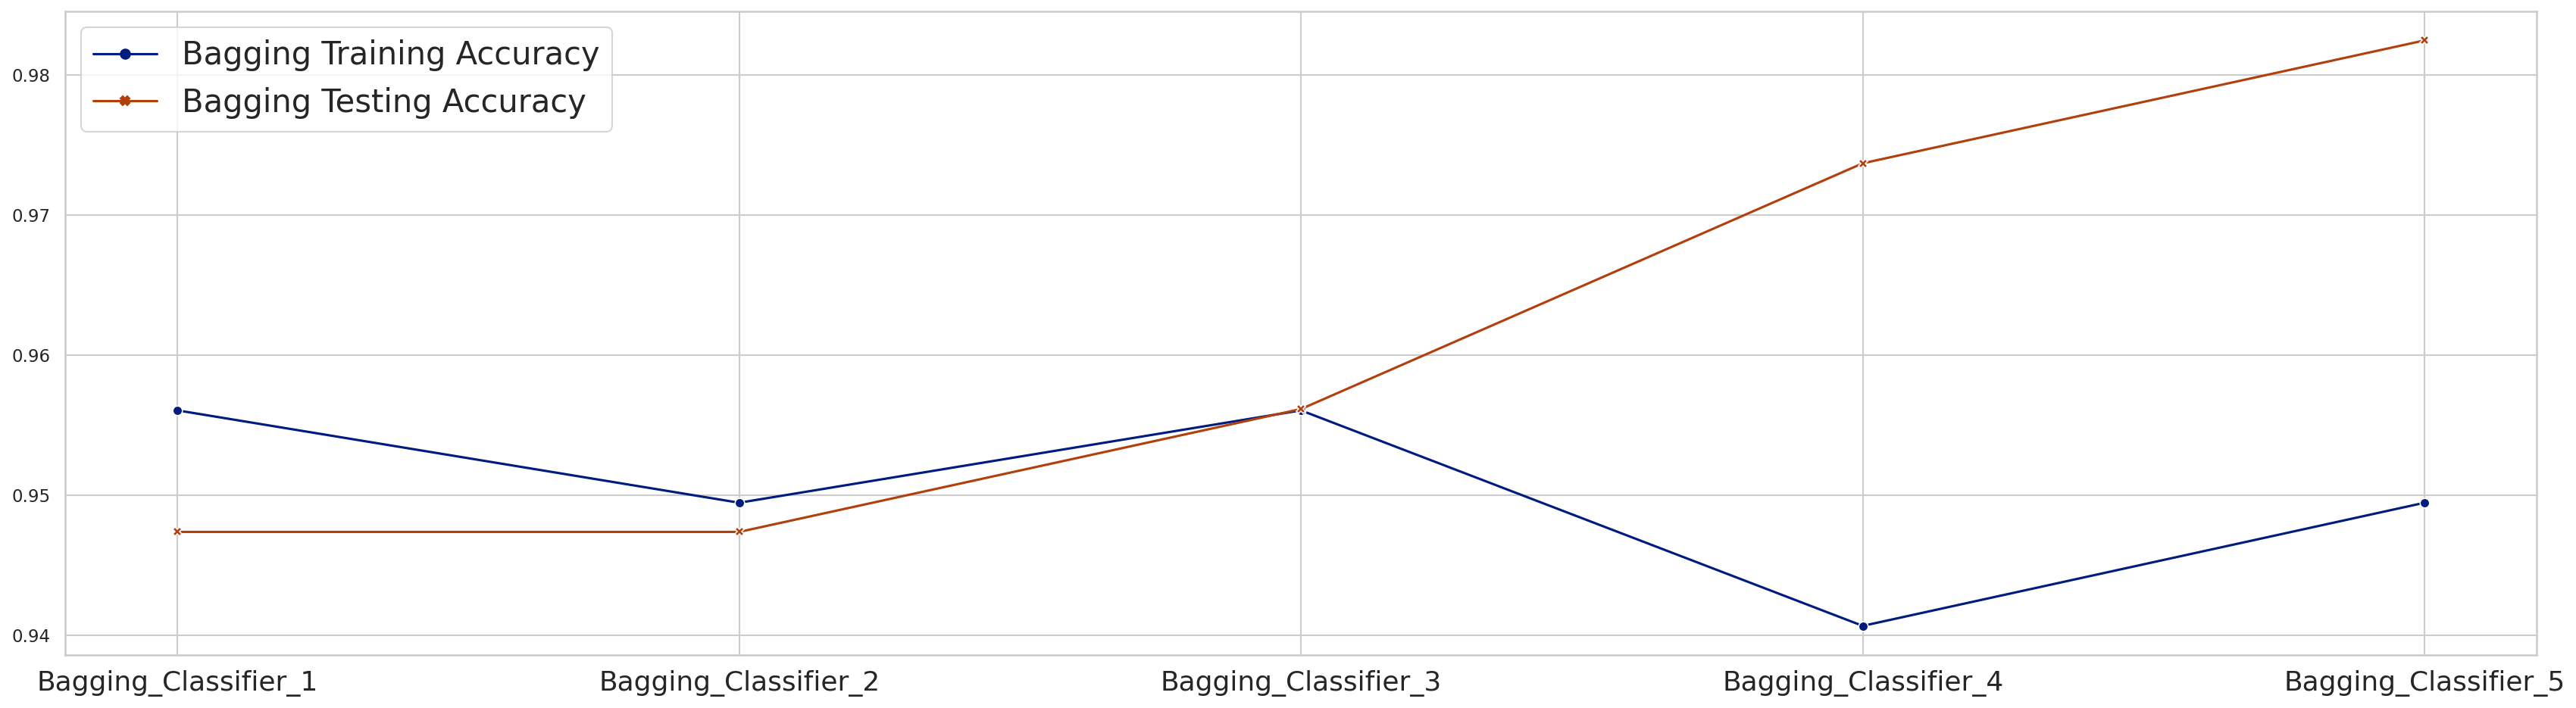

In [71]:
ax = sns.lineplot(data=[bagging_model_accuracy_compare['Bagging Training Accuracy'], bagging_model_accuracy_compare['Bagging Testing Accuracy']], dashes=False, markers=True)
ax.set_xticks(range(len(bagging_model_accuracy_compare['Bagging Algorithm'])))
ax.set_xticklabels(bagging_model_accuracy_compare['Bagging Algorithm'])

## **Analysis of the Bagging Classifier**
- Five bagging classifier models were trained with different parameters. The parameters that were changed across these classifiers were n_estimators and max_depth.
- From the plot of testing accuracy, it can be observed that the fifth bagging classifier outperformed all the other bagging classifiers even though the training accuracy of the fifth bagging classifier was just around 95%.
- It can be claimed that there is not much change in the testing accuracy when the max_depth across the clssifiers is same. However, the testing accuracy jumps up when the max_depth is increased.
- It can be claimed that there is no change in the testing accuracy when the n_estimators are variated from 25 to 50, but the testing accuracy jumps up when the n_estimators increases to 100.
- The third, fourth, and the fifth bagging classifier have a great performance on the testing set and can be regarded as close to ideal classifiers because the testing set accuracy is either equal to or greater than the training set accuracy. However, the first and the second bagging classifier are slightly overfitting the training data and therefore they are not able to generaliize well.

# **AdaBoost Classifier**


In [165]:
boosting_classification_models = ['Boosting_Classifier_1', 'Boosting_Classifier_2',  'Boosting_Classifier_3', 'Boosting_Classifier_4', 'Boosting_Classifier_5']

boosting_classifiers = []

boosting_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.02))
boosting_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=30, learning_rate=0.02))
boosting_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50, learning_rate=0.02))
boosting_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50, learning_rate=0.03))
boosting_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50, learning_rate=0.04))

In [166]:
boosting_train_accuracies = []
boosting_test_accuracies = []

for boosting_classifier in boosting_classifiers:
    boosting_pipeline = Pipeline(steps = [
              ('boosting_classifier',boosting_classifier)
           ])
    
    print(f'************START OF THE {boosting_classifier} MODEL************\n')
    
    print(f'Training the {boosting_classifier} model')
    boosting_model = boosting_pipeline.fit(X_train, y_train)

    print('\nTraining Details:')
    
    boosting_train_predictions = boosting_model.predict(X_train)
    boosting_train_accuracy = accuracy_score(y_train, boosting_train_predictions)
    boosting_train_accuracies.append(boosting_train_accuracy)
    print(f'{boosting_classifier} model traiing accuracy: {boosting_train_accuracy}')
    
    print(f'\nTesting the {boosting_classifier} model')

    print('\nTesting Details:')

    boosting_test_predictions = boosting_model.predict(X_test)
    boosting_test_accuracy = accuracy_score(y_test, boosting_test_predictions)
    boosting_test_accuracies.append(boosting_test_accuracy)
    print(f'{boosting_classifier} model testing accuracy: {boosting_test_accuracy}')

    print(f'\n************END OF THE {boosting_classifier} MODEL************\n\n')

************START OF THE AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) MODEL************

Training the AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) model

Training Details:
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) model traiing accuracy: 1.0

Testing the AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) model

Testing Details:
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) model testing accuracy: 0.956140350877193

************END OF THE AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) MODEL************


************START OF THE AdaBoostClassifier(base_estimator=DecisionTree

In [167]:
boosting_model_accuracy_compare = pd.DataFrame({'Boosting Algorithm' : boosting_classification_models, 'Boosting Training Accuracy' : boosting_train_accuracies, 'Boosting Testing Accuracy' : boosting_test_accuracies})
boosting_model_accuracy_compare.sort_values(by='Boosting Testing Accuracy', ascending=False)

,Boosting Algorithm,Boosting Training Accuracy,Boosting Testing Accuracy
0,Boosting_Classifier_1,1.0,0.956140
1,Boosting_Classifier_2,1.0,0.947368
2,Boosting_Classifier_3,1.0,0.947368
3,Boosting_Classifier_4,1.0,0.929825
4,Boosting_Classifier_5,1.0,0.929825


[Text(0, 0, 'Boosting_Classifier_1'),
 Text(0, 0, 'Boosting_Classifier_2'),
 Text(0, 0, 'Boosting_Classifier_3'),
 Text(0, 0, 'Boosting_Classifier_4'),
 Text(0, 0, 'Boosting_Classifier_5')]

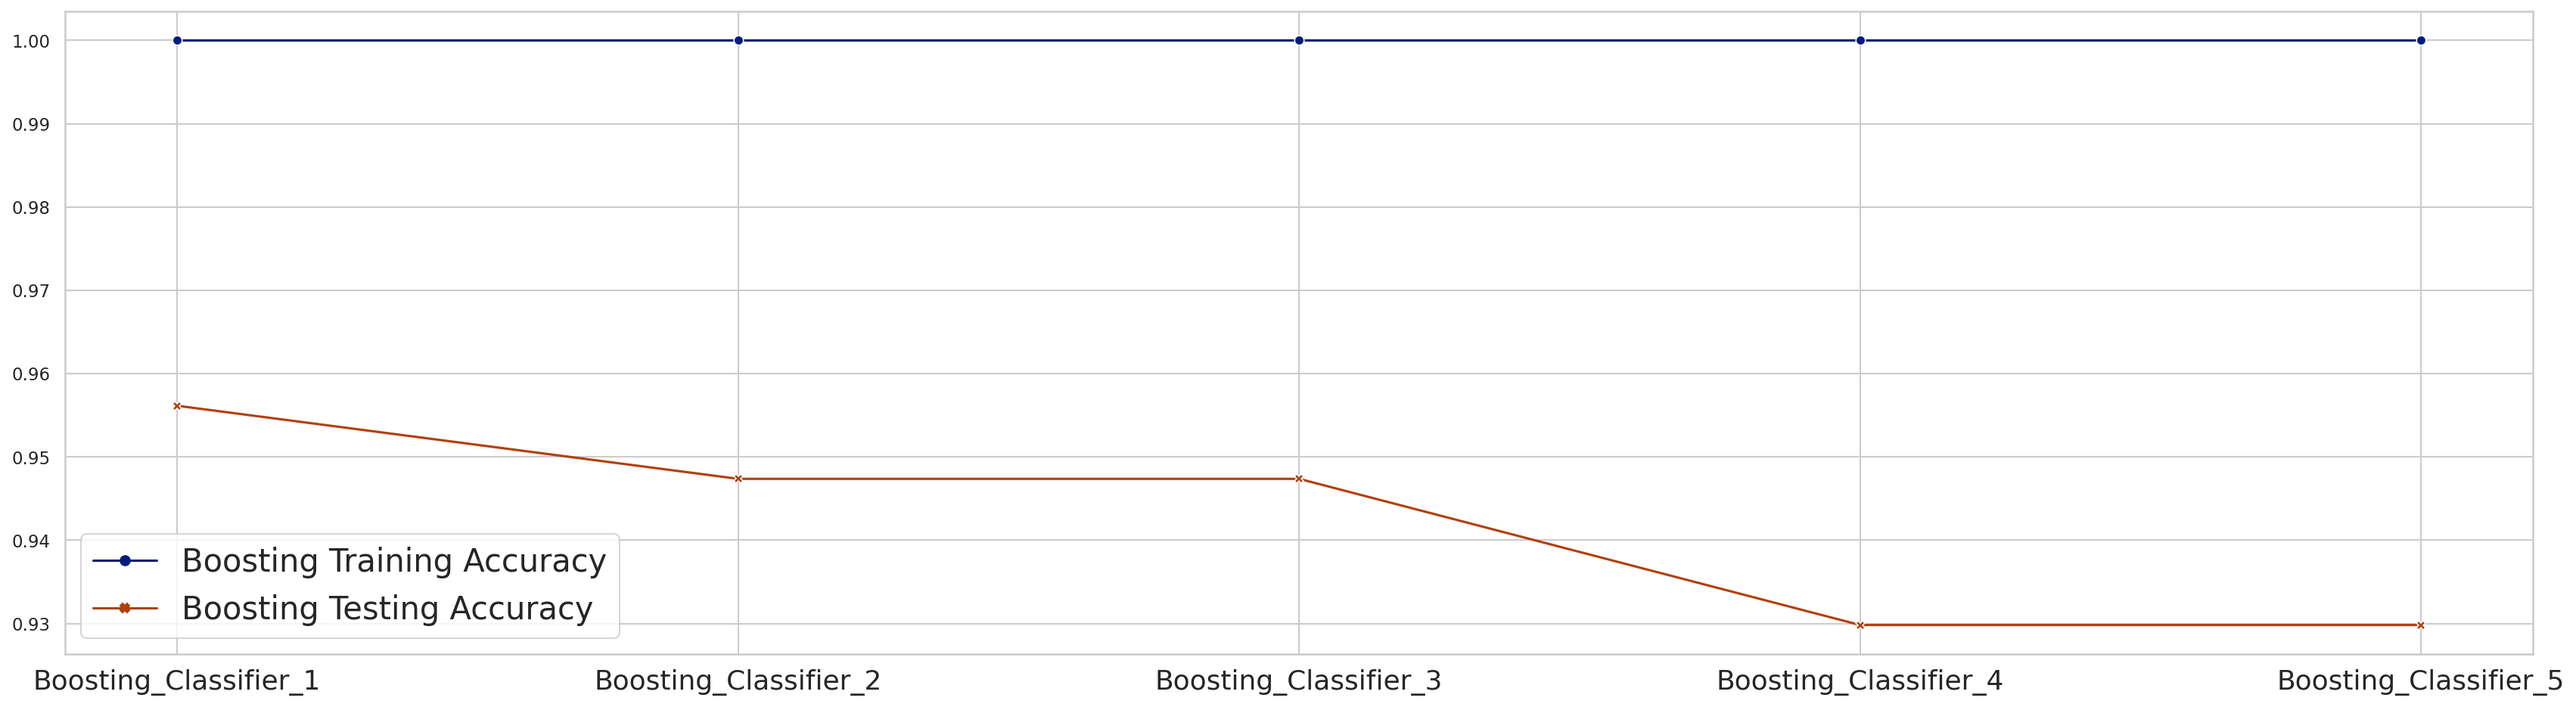

In [168]:
ax = sns.lineplot(data=[boosting_model_accuracy_compare['Boosting Training Accuracy'], boosting_model_accuracy_compare['Boosting Testing Accuracy']], dashes=False, markers=True)
ax.set_xticks(range(len(boosting_model_accuracy_compare['Boosting Algorithm'])))
ax.set_xticklabels(boosting_model_accuracy_compare['Boosting Algorithm'])

## **Analysis of the Boosting Classifier**
- Five boosting classifier models were trained with different parameters. The parameters that were changed across these classifiers were n_estimators and learning_rate.
- From the plot of training accuracy, it can be observed that for all the models, 100% training accuracy was achieved.
- From the plot of testing accuracy, it can be observed that the first boosting classifier outperformed all the other boosting classifiers.
- It can be claimed that the accuracy decreases with the increase in the n_estimator.
- It can be claimed that there is no change in the testing accuracy when the learning_rate is slightly increased while keeping the n_estimators constant.
- The boosting classifiers here can be seen as overfitting the training data as there performance is not good on the testing set i.e. models are not able to generalize well.